# Прогнозирование рекламной кампании интернет-магазина «Стримчик» на 2017 год.

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В рамках данного исследования необходимо было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Был проведен анализ данных, представленных в виде csv таблицы, вплоть до 2016 года, на основе которого можно спланировать кампанию на 2017-й. 

**План исследования**:
1. Изучение общей информации о cvs таблице с данными.

2. Предобработка данных:
* Замена названий столбцов;
* Обработка дубликатов;
* Преобразование данных в нужные типы; 
* Обработка пропусков при необходимости;
* Подсчёт суммарных продаж во всех регионах и их запись в отдельный столбец.

3. Исследовательский анализ данных.

Описание и визуализация информации о том:
* Сколько игр выпускалось в разные годы;
* Как менялись продажи по платформам (сотавление топ платформ с наибольшими суммарными продажами и построение распределения по годам; определение за какой характерный срок появляются новые и исчезают старые платформы);
* Какой период является актуальным, и на основе данных которого можно построить прогноз на 2017 год.
* Какие платформы лидируют по продажам, растут или падают;
* Как выглядит разбивка глобальных продаж игр по платформам;
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков (соотнесение выводов с продажами игр на других платформах);
* Как происходит общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

4. Составление портрета пользователя каждого региона.

Определение для пользователя каждого региона (NA, EU, JP):
* Топ-5 самых популярных платформ (описание различия в долях продаж);
* Топ-5 самые популярные жанры;
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

5. Проверка гипотез.
* Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


6. Общий вывод


#### Изучение общей информации о cvs таблице с данными.

In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#выведем первые 20 строк cvs таблицы
data = pd.read_csv('/datasets/games.csv')
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#посмотрим общую информацию о data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных присутствуют пропуски. Их особенно много в столбцах `Critic_Score`, `User_Score` и `Rating`. Названия всех столбцов обозначены неверно. Они должны быть приведены к нижнему регистру. Также в некоторых столбцах неверно указан тип данных (`Year_of_Release`, `User_Score`).

In [4]:
#посмотрим уникальные значения столбцов, чтобы посмотреть есть ли аномалии среди значений
for column in data:
    print(data[column].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.

Присутствует аномалия в столбце `user_score` - это аббревиатура tbd. В столбце `rating` есть выделяющееся значение 'K-A'. Это первоначальная версия «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» ("K-A" ("Kids to Adults"). Получается можно заменить эти значения на «E10+».

#### Предобработка данных

In [5]:
#создадим копию исходного датафрейма, чтобы использовать ее в дальнейшем
old_data = data.copy()

In [6]:
#приведем столбцы data к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь названия столбцов обозначены верно.

In [7]:
#проверим, есть ли дублиаты в датафрейме
data.duplicated().sum()

0

Дубликатов нет, идем дальше.

Теперь обработаем пропуски там, где это возможно. Обратим для начала внимание на пропуски в столбцах `name` и `genre`. В этих столбцах всего по 2 пропуска. Посмотрим совпадают ли пропуски для одной строки. Заменить пропуски невозможно, поскольку название игры и ее жанр ни от чего не зависит, поэтому их можно просто удалить. Также невозможно заполнить пропуски в столбце `year_of_release`, удалим и их.

In [8]:
#удалим те 2 строки, в которых отсутствует значения в столбце name и year_of_release
#и посмотрим остались ли пропуски в столбце genre
data = data.dropna(subset=['name', 'year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Удалив пропуски из столбца `name`, в столбце `genre` они тоже пропали, значит зависимость все же была. Возможно, произошел какой-то сбой при записи этих данных, как и при записи года для некоторых игр.

In [9]:
#посмотрим сколько данных осталось
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
#посчитаем долю оставшихся данных после удаления пропусков
new_data = len(data) / len(old_data) 

print(f'После устранения выбросов от исходного датафрейма осталось {new_data:.1%} данных')

После устранения выбросов от исходного датафрейма осталось 98.4% данных


Доля устраненных выбросов составила 1.6 %, что не превышает норму (удалено не больше 10% от исходного датафрейма).

Тип данных в столбце `year_of_release` указан, как *float*, что неверно, поскольку у года не может быть дробной части. Заменим тип данных на *int*, чтобы избавиться от дробной части. 

In [11]:
#изменим тип данных столбца year_of_release на int
data['year_of_release'] = data['year_of_release'].astype(int)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Тип данных в столбце `user_score` указан, как *object*. Необходимо изменить его на *float*, т.к. рейтинг - это числовое значение с дробной частью. В этом столбце есть аббревиатура 'tbd', что в переводе с английского to be determined = будет определено. Соответственно, игры с этими значениями в столбце `user_score` еще не оценены, т.е. их рейтинга пока попросту нет.

In [12]:
#перед тем, как заменить тип данных user_score сначала заменим аббревиатуры tbd на пропуски, т.е. на nan
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [13]:
#теперь заменим тип данных в столбце user_score
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь везде тип данных указан верно.

In [14]:
#заменим в столбце rating значения K-A на E10+
data['rating'] = data['rating'].replace('K-A', 'E10+')
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
#проверим сколько пропусков осталось
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Логично, что после замены значения 'tbd' в столбце `user_score`, пропусков в этом столбце стало больше.

Обработаем оставшиеся пропуски. В столбцах `user_score` и `critic_score` содержатся числовые значения, поэтому можно заменить пропуски на медианные значения.

In [16]:
#заполним пропуски  в user_score и critic_score значениями -1
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Пропуски заполнены, но для дальнейшего анализа будем использовать оценки критиков и пользователей >= 0.

In [17]:
#создадим срез данных, на основе которого будет проведен дальнейший анализ
data = data.query('user_score >= 0 and critic_score >= 0')

В столбце `rating` заменить пропуски можно на 'unknown', т.е. рейтинг игры неизвестен.

In [18]:
data['rating'] = data['rating'].fillna('unknown')
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропуски везде заполнены. Создадим столбец `total_sales`с сумарной продажей игр во всех регионах.

In [19]:
#посчитаем суммарное количество продаж для каждой игры
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Вывод: столбцы data были приведены к нижнему регистру. Дубликатов в данных обнаружено не было. Тип данных столбцов `year_of_release` и `user_score` был изменен. Пропуски заполнены там, где это было возможно. Кроме того, был создан столбец с суммарным количеством продаж для каждой игры. Аномальные значения в столбцах были заменены.

####  Исследовательский анализ данных

Опишем и визуализируем информацию о том:
* Сколько игр выпускалось в разные годы;
* Как менялись продажи по платформам (сотавление топ платформ с наибольшими суммарными продажами и построение распределения по годам; определение за какой характерный срок появляются новые и исчезают старые платформы);
* Какой период является актуальным, и на основе данных которого можно построить прогноз на 2017 год.
* Какие платформы лидируют по продажам, растут или падают;
* Как выглядит разбивка глобальных продаж игр по платформам;
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков (соотнесение выводов с продажами игр на других платформах);
* Как происходит общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

count    6894.000000
mean     2007.482303
std         4.236401
min      1985.000000
25%      2004.000000
50%      2007.000000
75%      2011.000000
max      2016.000000
Name: year_of_release, dtype: float64

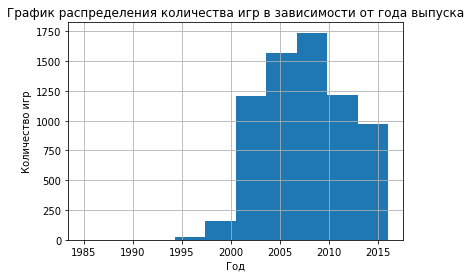

In [20]:
#для того, чтобы посмотреть сколько игр выпускалось в разные годы построим гистограмму
data['year_of_release'].plot(title='График распределения количества игр в зависимости от года выпуска', kind='hist', bins=10, grid=True)
plt.xlabel('Год')
plt.ylabel('Количество игр')

data['year_of_release'].describe()

Судя по графику, очень мало игр было выпущено в период с 1980 по 1995 г. Соответсвенно, данные об играх, выпущенных в то время не так важны. Больше всего игр было выпущено в период с 2007 по 2010 год. Предположительно, для дальнейшего анализа понадобятся данные за период с 2012 по 2016 год. Проверим это.

In [21]:
#сгруппируем данные по столбцу platform посчитаем суммарную стоимость прибыли для каждой платформы
top_sales = data.groupby('platform')['total_sales'].sum()

#выведем топ-8 прибыльных платформ
top_sales.sort_values(ascending=False).head(8)

platform
PS2     946.01
X360    853.67
PS3     785.44
Wii     659.23
DS      382.88
PS4     244.27
XB      212.22
PS      209.98
Name: total_sales, dtype: float64

Таким образом, топ-5 прибыльных платформ: PS2, X360, PS3, Wii, DS. Построим сводную таблицу по этим платформам.

In [22]:
#сделаем группировку игр, чтобы посмотреть, как менялись продажи по платформам
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XB']
data_pivot = pd.pivot_table(data.query('platform == @top_platforms'), index='year_of_release', 
                            columns='platform', values='total_sales', aggfunc='sum')
data_pivot

platform,DS,PS,PS2,PS3,PS4,Wii,X360,XB
year_of_release,,,,,,,,
1994,NaN,1.26,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,17.73,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,31.93,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,45.17,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,48.98,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,45.66,29.50,NaN,NaN,NaN,NaN,0.99
2001,NaN,19.14,145.96,NaN,NaN,NaN,NaN,20.72
2002,NaN,0.11,169.99,NaN,NaN,NaN,NaN,40.24
2003,NaN,NaN,144.27,NaN,NaN,NaN,NaN,42.68


Text(0, 0.5, 'Количество продаж')

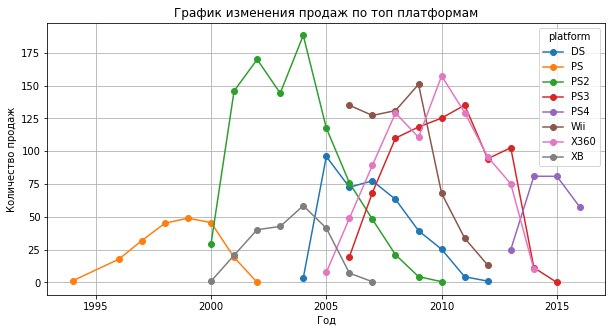

In [23]:
#построим график изменения продаж по топ платформам
data_pivot.plot(title='График изменения продаж по топ платформам', grid=True, figsize=(10, 5), style='o-')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

Исходя из полученного графика:

*PS* - появилась в 1994 г.

*PS2* и *XB* в 2000 г.

*DS* - в 2004 г.

*X360* - в 2005 г.

*Wii* и *PS3* - в 2006 г.

*PS4* - в 2013 г.

Довольно активно платформы появлялись в период за 2004-2006 г. Продажи на самых старых платформах, PS, PS2 и XB просуществовали в течение 7-10 лет. Из предыдущего графика более актуальными являются продажи за 2012-2016 год. Здесь самые высокие продажи у платформ X360, PS3 и PS4.

Допустим период с 2012 по 2016 год будет **актуальным**. Соответственно, на основе данных этого периода будем строить прогноз на 2017 год.

In [24]:
#составим датафрейм с данными за актуальный период
relevant_period = data.query('2012 <= year_of_release <= 2016')
relevant_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


Теперь есть отдельный датафрейм с данными за интересующий нас период. На основе него посмотрим, какие платформы лидируют по продажам, растут или падают, и выберем несколько потенциально прибыльных платформ.

In [25]:
#создадим сводную таблицу по данным за актуальный период, чтобы посчитать прибыльность всех платформ
relevant_pivot = pd.pivot_table(relevant_period, index='year_of_release', 
                            columns='platform', values='total_sales', aggfunc='sum')
relevant_pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,39.39,1.02,22.01,94.30,NaN,NaN,13.07,13.23,14.85,95.68,NaN
2013,15.89,NaN,10.98,102.70,25.07,0.15,5.96,NaN,17.40,75.17,14.92
2014,11.49,NaN,11.74,11.34,80.95,NaN,5.27,NaN,15.22,10.10,47.01
2015,10.55,NaN,7.18,0.02,80.90,NaN,1.72,NaN,15.35,NaN,44.58
2016,2.17,NaN,4.89,NaN,57.35,NaN,0.93,NaN,3.26,NaN,23.70


Text(0, 0.5, 'Количество продаж')

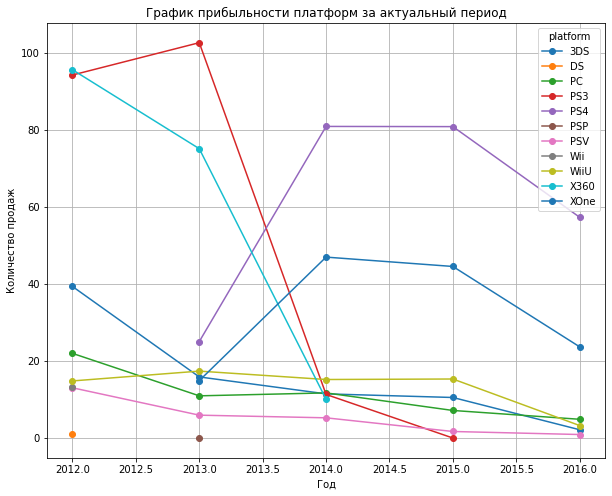

In [26]:
#построим график
relevant_pivot.plot(title='График прибыльности платформ за актуальный период', style='o-', grid=True, figsize=(10, 8))
plt.xlabel('Год')
plt.ylabel('Количество продаж')

Начиная с 2012 года, самыми прибыльными платформами оказались PS3 и X360, однако их продажи заметно снизились к 2014-2015 году. Делать прогнозы, основываясь на данных этих платформ, будет не самым лучшим решением. Тогда обратим внимание на платформы XOne и PS4. Обе платформы появились в 2013 году, количество их продаж активно росло за 2013-2015 год, однако потом они тоже снизились к 2016 году. Не смотря на это, количество продаж XOne и PS4 в период с 2013 по 2016 г. заметно выше по сравнению с продажами на других платформах, поэтому их можно назвать потенциально прибыльными.

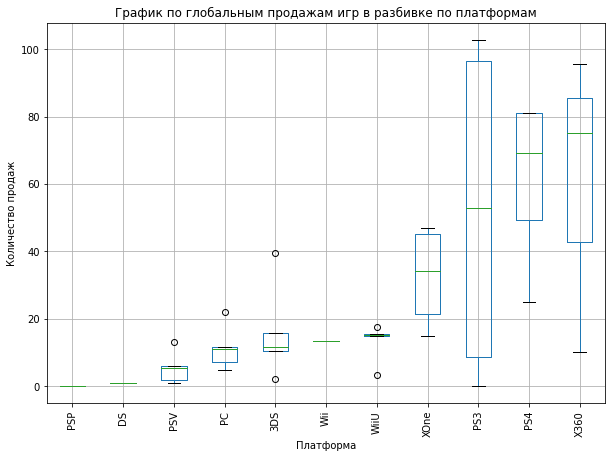

In [27]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

sort_inds = pd.np.argsort(relevant_pivot.median(axis=0)) 
relevant_pivot.iloc[:, sort_inds].boxplot(rot=90, figsize=(10,7))

plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('График по глобальным продажам игр в разбивке по платформам', loc='center')
plt.show()

За обозначенный нами актуальный период можно выделить 4 самых прибыльных платформ: X360, XOne, PS3, PS4. Глобальные продажи этих 4 плаформ заметно выше продаж других платформ, об этом свидетельствуют и медианы в "ящиках с усами". 

При этом, если сопоставить результаты этого графика с результатами предыдущего графика, то можно говорить о том, что платформы X360 и PS3 действительно входят в пятерку самых прибыльных платформ. Однако график прибыльности платформ за актуальный период показал, что, несмотря на, казалось бы, успешный старт продаж X360 и PS3 в 2012 году, их пик продаж пришелся на 2013 год, после этого их продажи только падали. В то же время **XOne** и **PS4** так и остаются среди числа самых прибыльных платформ.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого возьмем данные платфморы PS4.

In [28]:
#вычислим, есть ли зависимость продаж PS4 от отзывов критиков (коэф. корр. Пирсона)
#на основе данных за актуальный период
#для начала создадим датафрейм с данными о PS4
popular_data = relevant_period[relevant_period['platform'] == 'PS4'].copy()
popular_data['total_sales'].corr(popular_data['critic_score'])

0.40589480145836687

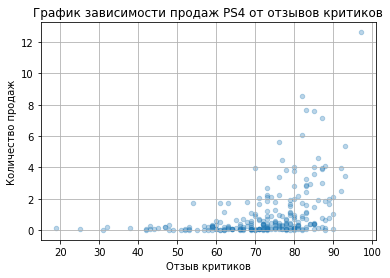

In [29]:
#построим диаграмму рассеяния
popular_data.plot(title='График зависимости продаж PS4 от отзывов критиков', x='critic_score', y='total_sales', 
                  kind='scatter', grid=True, alpha=0.3)
plt.xlabel('Отзыв критиков')
plt.ylabel('Количество продаж')
plt.show()

Есть средняя прямая связь, поэтому можно говорить о том, что зависимости между продажами PS4 и отзывами критиков присутствует, но желательно провести дополнительные исследования, чтобы с точностью убедиться в этом.

In [30]:
#вычислим, есть ли зависимость продаж PS4 от отзывов пользователей (коэф. корр. Пирсона)
popular_data['total_sales'].corr(popular_data['user_score'])

-0.03362497596528878

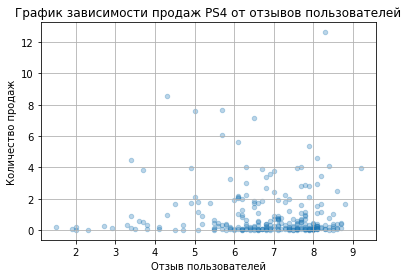

In [31]:
#построим диаграмму рассеяния
popular_data.plot(title='График зависимости продаж PS4 от отзывов пользователей', x='user_score', y='total_sales', 
                  kind='scatter', grid=True, alpha=0.3)
plt.xlabel('Отзыв пользователей')
plt.ylabel('Количество продаж')
plt.show()

Есть очень слабая обратная связь, поэтому здесь тоже можно сказать, что зависимости между продажами PS4 и отзывами пользователей нет.

Соотнесем выводы с продажами игр на других платформах. Не будем проверять корреляции данных всех 11 платформ, возьмем данные 4 самых прибыльных платформ за актуальный период, а именно: X360, XOne, PS3, PS4. По PS4 корреляции уже были вычислены, поэтому посчитаем корреляции продаж и отзывов пользователей и критиков остальных четырех платформ.

In [32]:
#для удобства создадим датафреймы, в котором будут данные о платформах
#и посчитаем корреляции продаж и отзывов критиков

data_1 = relevant_period[relevant_period['platform'] == 'X360'].copy()
res_1 = data_1['total_sales'].corr(data_1['critic_score'])
print(f'Корреляция продаж X360 и отзывов критиков составляет: {res_1}')

data_2 = relevant_period[relevant_period['platform'] == 'XOne'].copy()
res_2 = data_2['total_sales'].corr(data_2['critic_score'])
print(f'Корреляция продаж XOne и отзывов критиков составляет: {res_2}')

data_3 = relevant_period[relevant_period['platform'] == 'PS3'].copy()
res_3 = data_3['total_sales'].corr(data_3['critic_score'])
print(f'Корреляция продаж PS3 и отзывов критиков составляет: {res_3}')

Корреляция продаж X360 и отзывов критиков составляет: 0.36057348885073365
Корреляция продаж XOne и отзывов критиков составляет: 0.4104220356129637
Корреляция продаж PS3 и отзывов критиков составляет: 0.3310566175801407


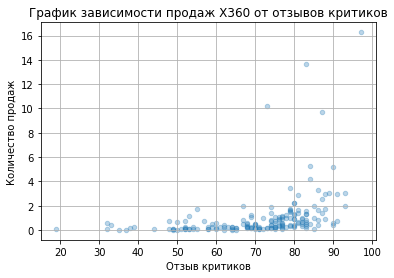

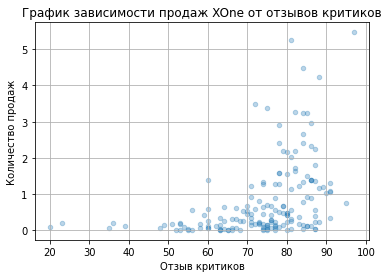

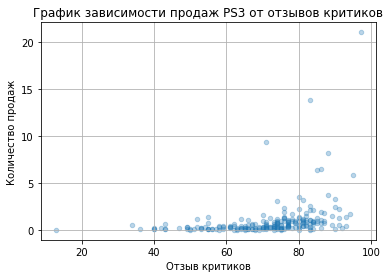

In [33]:
#построим диграммы рассеяния

data_1.plot(title='График зависимости продаж X360 от отзывов критиков', x='critic_score', y='total_sales', 
                  kind='scatter', grid=True, alpha=0.3)
plt.xlabel('Отзыв критиков')
plt.ylabel('Количество продаж')
plt.show()

data_2.plot(title='График зависимости продаж XOne от отзывов критиков', x='critic_score', y='total_sales', 
                  kind='scatter', grid=True, alpha=0.3)
plt.xlabel('Отзыв критиков')
plt.ylabel('Количество продаж')
plt.show()


data_3.plot(title='График зависимости продаж PS3 от отзывов критиков', x='critic_score', y='total_sales', 
                  kind='scatter', grid=True, alpha=0.3)
plt.xlabel('Отзыв критиков')
plt.ylabel('Количество продаж')
plt.show()

Для X360 и PS3 была обнаружена слабая прямая связь глобальных продаж и отзывов критиков. Для XOne связь между глобальными продажами и отзывами критиков средняя прямая. В целом, здесь можно говорить, что зависимость присутствует, но опять же было бы интересно проверить это в дополнительных исследованиях. Сопоставляя полученные результаты с результатами по платформе PS4, сложно утверждать о том, что однозначно есть зависимость между глобальными продажами платформ и отзывами критиков.

In [34]:
#теперь вычислим корреляции продаж топ платформ и отзывов пользователей

new_res_1 = data_1['total_sales'].corr(data_1['user_score'])
print(f'Корреляция продаж X360 и отзывов пользователей составляет: {new_res_1}')

new_res_2 = data_2['total_sales'].corr(data_2['user_score'])
print(f'Корреляция продаж XOne и отзывов пользователей составляет: {new_res_2}')

new_res_3 = data_3['total_sales'].corr(data_3['user_score'])
print(f'Корреляция продаж PS3 и отзывов пользователей составляет: {new_res_3}')

Корреляция продаж X360 и отзывов пользователей составляет: -0.0020140394826897853
Корреляция продаж XOne и отзывов пользователей составляет: -0.09400318326920852
Корреляция продаж PS3 и отзывов пользователей составляет: 0.0032274054930356904


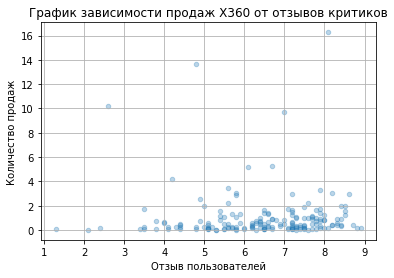

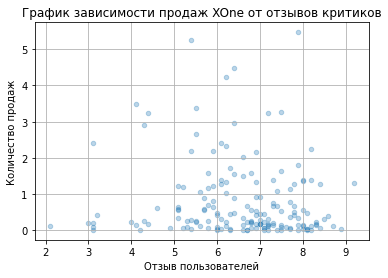

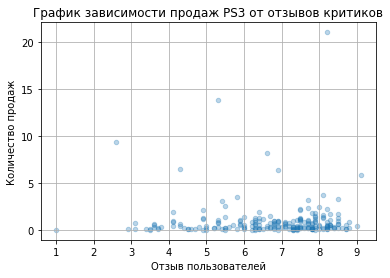

In [35]:
#построим диаграммы рассеяния

data_1.plot(title='График зависимости продаж X360 от отзывов критиков', x='user_score', y='total_sales', 
                  kind='scatter', grid=True, alpha=0.3)
plt.xlabel('Отзыв пользователей')
plt.ylabel('Количество продаж')
plt.show()

data_2.plot(title='График зависимости продаж XOne от отзывов критиков', x='user_score', y='total_sales', 
                  kind='scatter', grid=True, alpha=0.3)
plt.xlabel('Отзыв пользователей')
plt.ylabel('Количество продаж')
plt.show()


data_3.plot(title='График зависимости продаж PS3 от отзывов критиков', x='user_score', y='total_sales', 
                  kind='scatter', grid=True, alpha=0.3)
plt.xlabel('Отзыв пользователей')
plt.ylabel('Количество продаж')
plt.show()

Для платформ X360 и XOne была обнаружена слабая обратная связь глобальных продаж и отзывов пользователей. Для PS3 связь оказалась прямая, но тоже очень слабая. Получается, зависимости между глобальными продажами и отзывами пользователей нет.

Посмотрим на общее распределение игр по жанрам.

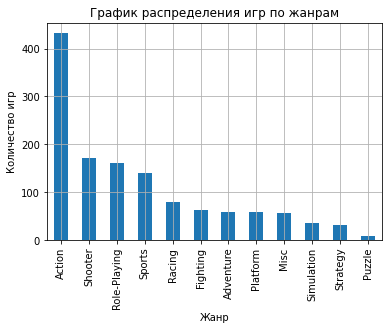

In [36]:
#сначала сгруппируем данные так, чтобы был отдельный датафрейм с распределением игр по жанрам
#отсортируем полученный датафрейм по убыванию
genre = relevant_period.groupby('genre')['name'].count().sort_values(ascending=False)
genre.plot(title='График распределения игр по жанрам', kind='bar', grid=True)

plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

За актуальный период самыми популярными жанрами игр являются action, shooter, role-playing, sports и racing. Более того, количество игр жанра action превышает количество игр других жанров в несколько раз. Менее популярными являются игры жанра platform, misc, strategy и puzzle.

In [37]:
#создадим сводную таблицу, чтобы составить топ прибыльных жанров
genre_pivot = relevant_period.pivot_table(index='genre', values='total_sales', aggfunc='median')
genre_pivot = genre_pivot.sort_values(by='total_sales', ascending=False)
genre_pivot

,total_sales
genre,
Shooter,0.570
Sports,0.540
Misc,0.365
Action,0.280
Platform,0.255
Strategy,0.220
Fighting,0.215
Role-Playing,0.210
Simulation,0.200


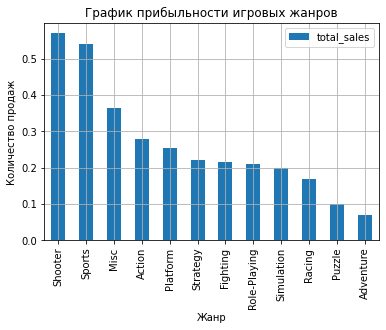

In [38]:
#создадим график распределения жанров игр по их прибыльности
genre_pivot.plot(title='График прибыльности игровых жанров', kind='bar', grid=True)

plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

График распределения игр по жанрам отличается от графика распределения продаж по жанрам. Самыми прибыльными жанрами являются shooter, sports, misc, action и platform. Менее же прибыльные продажи игр жанров role-playing, simulation, racing, puzlle. Интересно, что такой популярный жанр игр, как action, является наименее прибыльным.

#### Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
1. Топ-5 самых популярных платформ; 
2. Топ-5 самые популярные жанры; 
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [39]:
#создадим сводную таблицу, чтобы посмотреть какие платформы игр популярны для Европы
eu_p = relevant_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_p = eu_p.sort_values(by='eu_sales', ascending=False)
eu_p.reset_index()

,platform,eu_sales
0,PS4,112.44
1,PS3,78.49
2,X360,57.15
3,XOne,42.23
4,PC,33.71
5,WiiU,20.42
6,3DS,20.01
7,PSV,7.39
8,Wii,4.10
9,DS,0.05


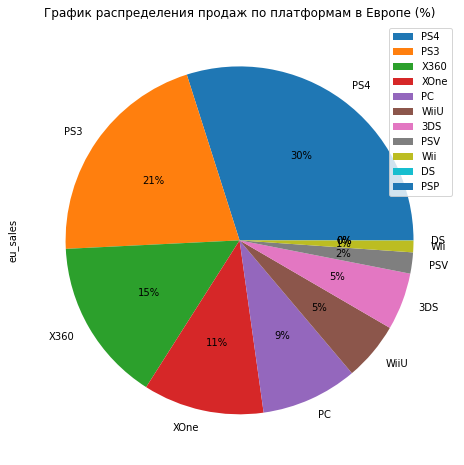

In [40]:
#построим круговую диаграмму, чтобы описать различия в долях продаж
eu_p.plot(title='График распределения продаж по платформам в Европе (%)', kind='pie', y='eu_sales', 
          autopct='%1.0f%%', figsize=(15,8))
plt.show()

В Европе топ-5 самых популярных игровых платформ: PS4, PS3, X360, XOne, PC. При этом доля продаж PS4 и PS3 составляет 51% от всех продаж.

In [41]:
#создадим сводную таблицу, чтобы посмотреть какие жанры игр популярны для Сев. Америки
na_p = relevant_period.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_p = na_p.sort_values(by='na_sales', ascending=False)
na_p.reset_index()

,platform,na_sales
0,X360,106.99
1,PS4,84.46
2,PS3,77.11
3,XOne,76.03
4,WiiU,30.69
5,3DS,28.53
6,PC,17.72
7,PSV,8.52
8,Wii,7.03
9,DS,0.56


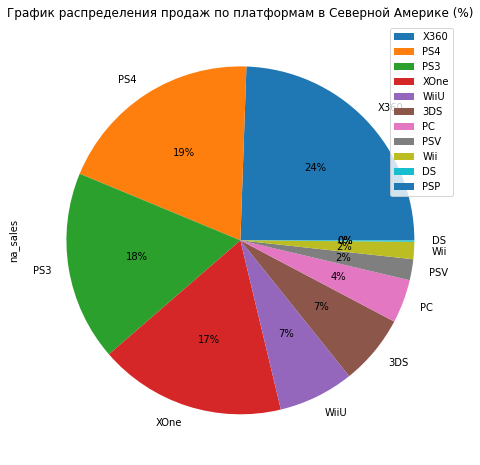

In [42]:
#построим круговую диаграмму, чтобы описать различия в долях продаж
na_p.plot(title='График распределения продаж по платформам в Северной Америке (%)', kind='pie', y='na_sales', 
          autopct='%1.0f%%', figsize=(15,8))
plt.show()

Для Северной Америки топ-5 самых популярных игровых платформ схож с топом игровых платформ в Европе: PS4, PS3, X360, XOne, WiiU. Однако здесь доли продаж у платформ несколько другие. В Северной Америке лидером продаж является X360 (24%), хотя PS4 (19%) и PS3 (18%) все еще в тройке самых прибыльных платформ.

In [43]:
#создадим сводную таблицу, чтобы посмотреть какие жанры игр популярны для Японии
jp_p = relevant_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_p = jp_p.sort_values(by='jp_sales', ascending=False)
jp_p.reset_index()

,platform,jp_sales
0,3DS,26.54
1,PS3,20.38
2,WiiU,10.17
3,PS4,9.43
4,PSV,7.05
5,X360,1.38
6,Wii,1.09
7,DS,0.37
8,XOne,0.29
9,PSP,0.15


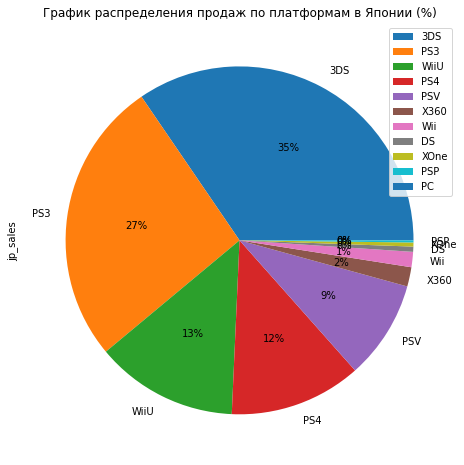

In [44]:
#построим круговую диаграмму, чтобы описать различия в долях продаж
jp_p.plot(title='График распределения продаж по платформам в Японии (%)', kind='pie', y='jp_sales', 
          autopct='%1.0f%%', figsize=(15,8))
plt.show()

Для Японии топ-5 игровых платформ выглядит уже немного иначе - это 3DS, PS3, WiiU, PS4, PSV. Интересно, что у платформы 3DS доля продаж составялет целых 35%. На вотором месте стоит PS3 (27%), на третьем WiiU (13%).

Теперь определим топ-5 жанров для каждого региона.

In [45]:
#создадим сводную таблицу, чтобы посмотреть какие жанры наиболее популярны в Европе
#отсортируем полученный датафрейм по убыванию
eu_g = relevant_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_g = eu_g.sort_values(by='eu_sales', ascending=False).head(5)
eu_g.reset_index()

,genre,eu_sales
0,Action,127.81
1,Shooter,89.26
2,Sports,53.81
3,Role-Playing,28.34
4,Racing,20.84


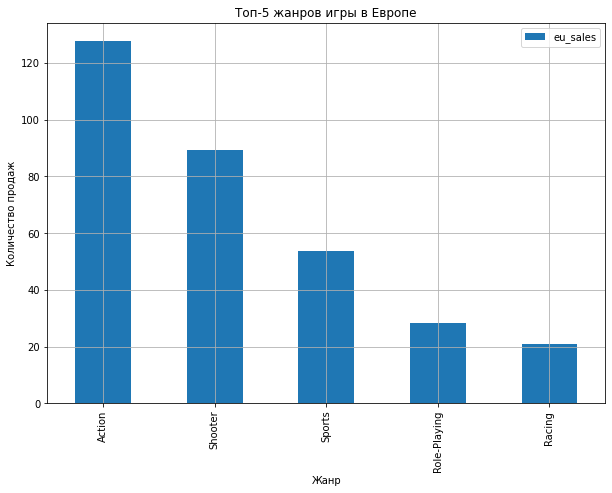

In [46]:
#построим столбчатую диаграмму по полученной сводной таблице
eu_g.plot(title='Топ-5 жанров игры в Европе', kind='bar', y='eu_sales', figsize=(10,7), grid=True)
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Самые популярные жанры игр в Европе: action, shooter, sports, role-playing, racing.

In [47]:
#создадим сводную таблицу, чтобы посмотреть какие жанры наиболее популярны в Сев. Америк
#отсортируем полученный датафрейм по убыванию
na_g = relevant_period.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_g = na_g.sort_values(by='na_sales', ascending=False).head(5)
na_g.reset_index()

,genre,na_sales
0,Action,139.84
1,Shooter,115.75
2,Sports,65.83
3,Role-Playing,36.76
4,Platform,20.39


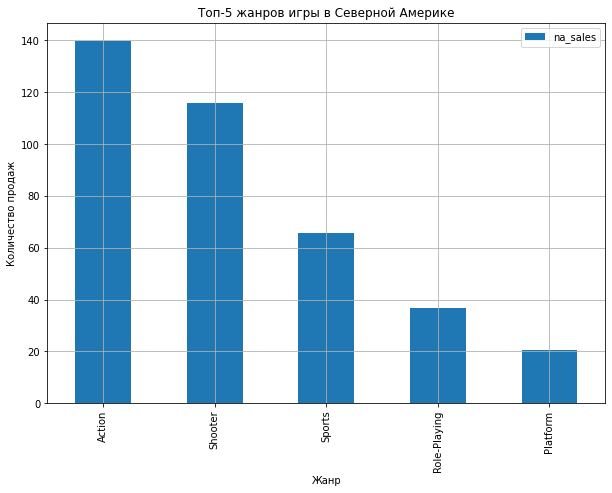

In [48]:
#построим столбчатую диаграмму по полученной сводной таблице
na_g.plot(title='Топ-5 жанров игры в Северной Америке', kind='bar', y='na_sales', figsize=(10,7), grid=True)
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Самые популярные жанры игр в Северной Америке: action, shooter, sports, role-playing, platform. Топ жанров Северной Америки довольно похож с топом жанров игр в Европе. Однако на последнем месте этого топа стоит жанр platform.

In [49]:
#создадим сводную таблицу, чтобы посмотреть какие жанры наиболее популярны в Японии
#отсортируем полученный датафрейм по убыванию
jp_g = relevant_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_g = jp_g.sort_values(by='jp_sales', ascending=False).head(5)
jp_g.reset_index()

,genre,jp_sales
0,Action,20.92
1,Role-Playing,17.52
2,Platform,7.96
3,Shooter,7.62
4,Simulation,7.29


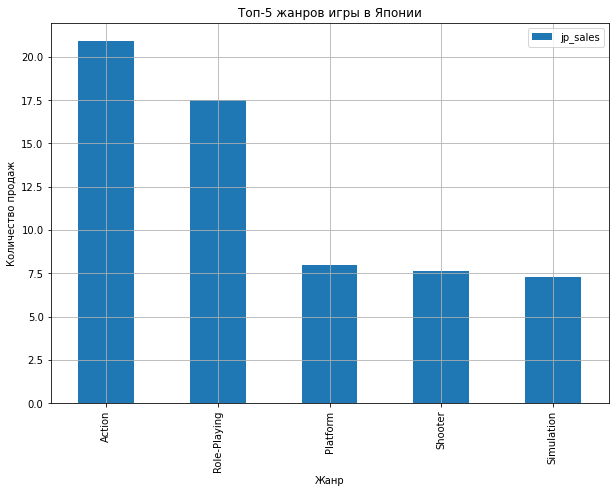

In [50]:
#построим столбчатую диаграмму по полученной сводной таблице
jp_g.plot(title='Топ-5 жанров игры в Японии', kind='bar', y='jp_sales', figsize=(10,7), grid=True)
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Для Японии же топ жанров: action, role-playing, platform, shooter, simulation. Этот список самых популярных жанров отличается от предыдущих двух. Здесь появились другие жанры.

Теперь посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Для начала посмотрим, что означает каждый рейтинг:

**М** - подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.

**Е10+** - подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.

**Е** - подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.

**Т** - подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.

**unknown** - рейтинг неизвестен по причине того, что игре еще не присвоили рейтинг или в данных есть пропуск при указании рейтинга.

In [51]:
#создадим сводную таблицу, чтобы посмотреть количество проданных игр в зависимости от рейтинга ESRB в Европе
#отсортируем полученный датафрейм по убыванию
eu_r = relevant_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_r = eu_r.sort_values(by='eu_sales', ascending=False)
eu_r.reset_index()

,rating,eu_sales
0,M,183.82
1,E,97.44
2,T,49.86
3,E10+,41.46
4,unknown,3.41


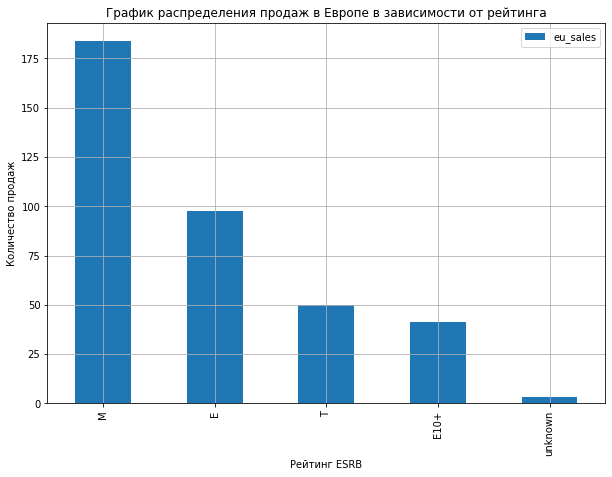

In [52]:
#построим столбчатую диаграмму по полученной сводной таблице
eu_r.plot(title='График распределения продаж в Европе в зависимости от рейтинга', kind='bar', y='eu_sales', figsize=(10,7), grid=True)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж')
plt.show()

В Европе больше всего продано игр, которые подходят для лиц старше 17 лет (М-рейтинг). На втором месте популярности - игры для всех возрастных категорий (Е-рейтинг). Третье и четвертое место занимают игры для детей и подростков. На последнем месте стоят игры с неизвестным рейтингом (unknown).

In [53]:
#создадим сводную таблицу, чтобы посмотреть количество проданных игр в зависимости от рейтинга ESRB в Сев. Америке
#отсортируем полученный датафрейм по убыванию
na_r = relevant_period.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_r = na_r.sort_values(by='na_sales', ascending=False)
na_r.reset_index()

,rating,na_sales
0,M,217.67
1,E,99.19
2,T,61.32
3,E10+,58.40
4,unknown,1.06


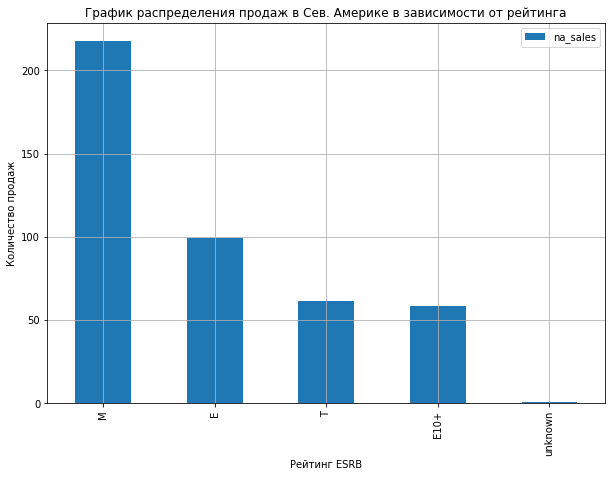

In [54]:
#построим столбчатую диаграмму по полученной сводной таблице
na_r.plot(title='График распределения продаж в Сев. Америке в зависимости от рейтинга', kind='bar', y='na_sales', figsize=(10,7), grid=True)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж')
plt.show()

Отметим, что в Северной Америке распределение продаж в зависимости от ESRB рейтинга очень схоже с распределением продаж в зависимости от ESRB рейтинга в Европе.

In [55]:
#создадим сводную таблицу, чтобы посмотреть количество проданных игр в зависимости от рейтинга ESRB в Японии
#отсортируем полученный датафрейм по убыванию
jp_r = relevant_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_r = jp_r.sort_values(by='jp_sales', ascending=False)
jp_r.reset_index()

,rating,jp_sales
0,E,26.79
1,T,21.86
2,M,20.02
3,E10+,7.95
4,unknown,0.23


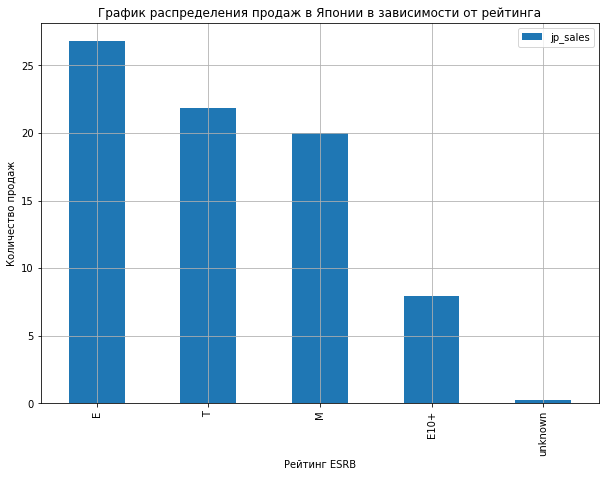

In [56]:
#построим столбчатую диаграмму по полученной сводной таблице
jp_r.plot(title='График распределения продаж в Японии в зависимости от рейтинга', kind='bar', y='jp_sales', figsize=(10,7), grid=True)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж')
plt.show()

Для Японии распределение продаж по рейтингам ESRB выглядит схоже с предыдущими графиками. Меньше всего продано игр с неизвестным рейтингом (unknown). 

#### Проверка гипотез

Необходимо проверить следующие гипотезы:

**Гипотеза 1**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Гипотеза 2**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Проверим сначала **первую гипотезу** о том, что пользовательские рейтинги XOne и PC одинаковые. Гипотезу необходимо проверить на двух независимых выборках. Нулевая гипотеза будет утверждать о равенстве значений двух выборок, а альтернативная об их неравенстве.

Н0: Средние пользовательские рейтинги платформы XOne = средние пользовательские рейтинги платформы PC.

Н1: Средние пользовательские рейтинги платформы XOne ≠ средние пользовательские рейтинги платформы PC.

In [57]:
#перед тем, как проверять гипотезы, создадим датафреймы для игр платформ XOne и PC
pc = relevant_period.query('platform == "PC"')
xone = relevant_period.query('platform == "XOne"')

In [58]:
#для проверки гипотезы используем метод scipy.stats.ttest_ind
#возьмем данные датафреймов pc и xone
#и превратим их в список значений
pc_u_score = pc['user_score'].tolist()
xone_u_score = xone['user_score'].tolist()

average_pc = sum(pc_u_score) / len(pc_u_score)
average_xone = sum(xone_u_score) / len(xone_u_score)

alpha = 0.05
results = st.ttest_ind(pc_u_score, xone_u_score, equal_var=False)

print(f'Средний пользовательский рейтинг XOne: {average_xone}')
print(f'Средний пользовательский рейтинг PC: {average_pc}')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг XOne: 6.538181818181819
Средний пользовательский рейтинг PC: 6.454314720812182
p-value: 0.5926561176517491
Нет оснований отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, значит средние пользовательские рейтинги платформ Xbox One и PC действительно одинаковые.

**Вторая гипотеза** гласит о том, что средние пользовательские рейтинги жанров Action и Sports разные. Для проверки этой гипотезы потребуются данные двух независимых выборок. Соответственно, нулевая гипотеза будет утверждать о равенстве значений двух выборок, а альтернативная об их неравенстве.

Н0: Средние пользовательские рейтинги жанра Action = средние пользовательские рейтинги жанра Sports.

Н1: Средние пользовательские рейтинги жанра Action ≠ средние пользовательские рейтинги жанра Sports.

In [59]:
#перед тем, как проверять гипотезы, создадим датафреймы для жанров Action и Sports
action = relevant_period.query('genre == "Action"')
sports = relevant_period.query('genre == "Sports"')

In [60]:
#для проверки гипотезы используем метод scipy.stats.ttest_ind
#возьмем данные датафреймов action и sports
#и превратим их в список значений
action_u_score = action['user_score'].tolist()
sports_u_score = sports['user_score'].tolist()

average_action = sum(action_u_score) / len(action_u_score)
average_sports = sum(sports_u_score) / len(sports_u_score)

alpha = 0.05
results = st.ttest_ind(action_u_score, sports_u_score, equal_var=False)

print(f'Средний пользовательский рейтинг жанра Action: {average_action}')
print(f'Средний пользовательский рейтинг жанра Sports: {average_sports}')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг жанра Action: 6.899305555555563
Средний пользовательский рейтинг жанра Sports: 5.819858156028368
p-value: 5.858072645452818e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута, следовательно, средние пользовательские рейтинги жанров Action и Sports действительно разные.

#### Общий вывод



В рамках этого исследования были проанализированы исторические данные до 2016 года, взятые из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). 

**Цель исследования** состояла в выявлении закономерностей, определяющих успешность игры. 

#### Этап 1. Изучение и предварительная обработка данных

На этапе предобработки были произведены: 
- приведение названий столбцов в нужный вид;
- изменение типа данных столбцов; 
- обработка аномальных значений в столбцах;
- проверка данных на наличие пропущенных значений и дубликатов, и их обработка там, где это необходимо;
- добавление столбца с суммарным количеством продаж для каждой игры

Все столбцы датафрейма были приведены к нижнему регистру. Дубликатов в данных обнаружено не было. Тип данных столбцов `year_of_release` и `user_score` был изменен. Пропуски заполнены там, где это было возможно. Строки, в которых логическая замена пропусков была невозможна, были удалены. Возможно, произошел какой-то сбой при записи этих данных. Кроме того, был создан столбец с суммарным количеством продаж для каждой игры. Аномальные значения в столбцах были заменены.

#### Этап 2. Исследовательский анализ данных

На этом этапе была описана и визуализирована общая информация о пользователях и поездках:
* Сколько игр выпускалось в разные годы;

Очень мало игр было выпущено в период с 1980 по 1995 г. Соответсвенно, данные об играх, выпущенных в то время не так важны. Больше всего игр было выпущено в период с 2007 по 2010 год. Возникло предположение, что для дальнейшего анализа понадобятся данные за период с 2012 по 2016 год.

* Как менялись продажи по платформам (сотавление топ платформ с наибольшими суммарными продажами и построение распределения по годам; определение за какой характерный срок появляются новые и исчезают старые платформы);

Топ-5 прибыльных платформ: PS2, X360, PS3, Wii, DS. 

PS - появилась в 1994 г.

PS2 и XB в 2000 г.

DS - в 2004 г.

X360 - в 2005 г.

Wii и PS3 - в 2006 г.

PS4 - в 2013 г.

Довольно активно платформы появлялись в период за 2004-2006 г. Продажи на самых старых платформах, PS, PS2 и XB просуществовали в течение 7-10 лет. Из предыдущего вывода более актуальными являются продажи за 2012-2016 год. В этот период самые высокие продажи у платформ X360, PS3 и PS4.


* Какой период является актуальным, и на основе данных которого можно построить прогноз на 2017 год.

В качестве актуального периода был выбран период с 2012 по 2016 год. Соответственно, на основе данных этого периода будет построен прогноз на 2017 год.

* Какие платформы лидируют по продажам, растут или падают;

Начиная с 2012 года, самыми прибыльными платформами оказались PS3 и X360, однако их продажи заметно снизились к 2014-2015 году. Делать прогнозы, основываясь на данных этих платформ, будет не самым лучшим решением. Лучшим решением будет обратить внимание на платформы XOne и PS4. Обе платформы появились в 2013 году, количество их продаж активно росло за 2013-2015 год, однако потом они тоже снизились к 2016 году. Не смотря на это, количество продаж XOne и PS4 в период с 2013 по 2016 г. заметно выше по сравнению с продажами на других платформах, поэтому их можно назвать потенциально прибыльными.

* Как выглядит разбивка глобальных продаж игр по платформам;

За обозначенный нами актуальный период можно выделить 4 самых прибыльных платформ: X360, XOne, PS3, PS4. Глобальные продажи этих 4 плаформ заметно выше продаж других платформ.

При этом, если сопоставить результаты этого графика с результатами предыдущего графика, то можно говорить о том, что платформы X360 и PS3 действительно входят в четверку самых прибыльных платформ. Однако график прибыльности платформ за актуальный период показал, что, несмотря на, казалось бы, успешный старт продаж X360 и PS3 в 2012 году, их пик продаж пришелся на 2013 год, после этого их продажи только падали. В то же время **XOne** и **PS4** так и остаются среди числа самых прибыльных платформ.

* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков (соотнесение выводов с продажами игр на других платформах);

Для этого анализа были взяты данные платфморы PS4. Было обнаружено, что слабая зависимость между продажами PS4 и отзывами критиков присутствует, но желательно провести дополнительные исследования, чтобы с точностью убедиться в этом. Зависимости между продажами PS4 и отзывами пользователей нет.

Сопоставляя результаты корелляционного анализа продаж других платформ, из числа самых прибыльных, с результатами по платформе PS4, сложно утверждать о том, что однозначно есть зависимость между глобальными продажами платформ и отзывами критиков. Для других платформ зависимости между глобальными продажами и отзывами пользователей нет.

* Как происходит общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

За актуальный период самыми популярными жанрами игр являются *action, role-playing, adventure, sports* и *shooter*. Более того, количество игр жанра *action* превышает количество игр других жанров в несколько раз. Меньше всего игр жанра *platform, simulation, stratedgy*. Самым непопулярным жанром же является *puzzle*. 

Самыми прибыльными жанрами являются *shooter, sports, misc, action и platform*. Менее же прибыльные продажи игр жанров *role-playing, simulation, racing, puzlle*. Интересно, что такой популярный жанр игр, как *action*, является наименее прибыльным.


#### Этап 3. Составление портрета пользователя каждого региона.

*Портрет пользователя Европы*:

1. Топ-5 самых популярных игровых платформ: PS4, PS3, X360, XOne, PC. При этом доля продаж PS4 и PS3 составляет 51% от всех продаж.
2. Самые популярные жанры игр в Европе: action, shooter, sports, role-playing, racing.
3. В Европе больше всего продано игр, которые подходят для лиц старше 17 лет. На втором месте популярности - игры для всех возрастных категорий. Третье и четвертое место занимают игры для детей и подростков. На последнем месте стоят игры с неизвестным рейтингом.

*Портрет пользователя Северной Америки*:

1. Для Северной Америки топ-5 самых популярных игровых платформ схож с топом игровых платформ в Европе: PS4, PS3, X360, XOne, WiiU. Однако здесь доли продаж у платформ несколько другие. В Северной Америке лидером продаж является X360 (24%), хотя PS4 (19%) и PS3 (18%) все еще в тройке самых прибыльных платформ.
2. Самые популярные жанры игр в Северной Америке: *action, shooter, sports, role-playing, platform*. Топ жанров Северной Америки довольно похож с топом жанров игр в Европе. Однако на последнем месте этого топа стоит жанр *platform*.
3. В Северной Америке распределение продаж в зависимости от ESRB рейтинга очень схоже с распределением продаж в зависимости от ESRB рейтинга в Европе.


*Портрет пользователя Японии*:

1.  Топ-5 игровых платформ выглядит уже немного иначе - это 3DS, PS3, WiiU, PS4, PSV. Интересно, что у платформы 3DS доля продаж составялет целых 35%. На вотором месте стоит PS3 (27%), на третьем WiiU (13%).
2. Для Японии же топ жанров: *action, role-playing, platform, shooter, simulation*. Этот список самых популярных жанров отличается от предыдущих двух. Здесь появились другие жанры.
3. Для Японии распределение продаж по рейтингам ESRB выглядит схоже с распределениями продаж в Европе и Северной Америке. Меньше всего продано игр с неизвестным рейтингом (unknown).

#### Этап 4. Проверка гипотез

Гипотеза 1 о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые **подтвердилась**.

Гипотеза 2 о том, что средние пользовательские рейтинги жанров Action и Sports разные **подтвердилась**.

Результаты данного исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.